# Fashion MNIST

This project is focused on image classification using neural networks, specifically targeting the Fashion MNIST dataset.

Dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist

Example Solution: https://thecleverprogrammer.com/2022/01/10/classification-with-neural-networks-using-python/

Hugging Face: https://huggingface.co/spaces/alperugurcan/fashion-mnist


## 1. Load and visualize the data

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

xtrain = xtrain / 255.0
xtest = xtest / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


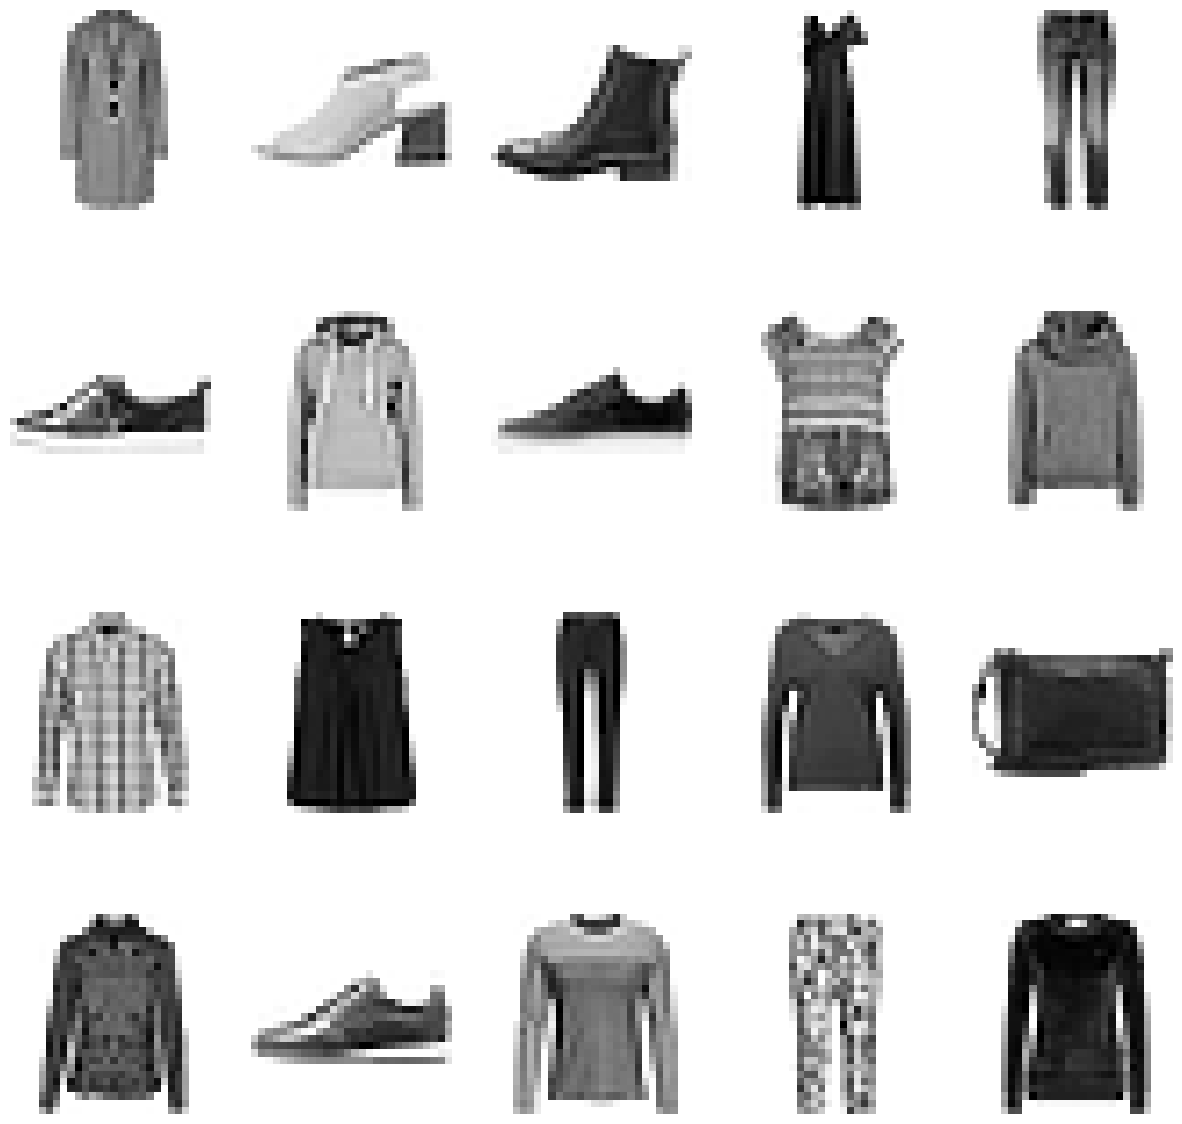

In [16]:
# Random samples
fig, axs = plt.subplots(4, 5, figsize=(15, 15))
[ax.imshow(xtrain[np.random.randint(xtrain.shape[0])], cmap='binary').axes.axis('off') for ax in axs.flat]
plt.show()

## 2. Building a Neural Network

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
## 3. Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [19]:
## 4. Train the model
history = model.fit(xtrain, ytrain, epochs=5, validation_data=(xtest, ytest))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6846 - loss: 0.9944 - val_accuracy: 0.7888 - val_loss: 0.5778
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8262 - loss: 0.5016 - val_accuracy: 0.8193 - val_loss: 0.5066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8443 - loss: 0.4493 - val_accuracy: 0.8391 - val_loss: 0.4555
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.8549 - loss: 0.4122 - val_accuracy: 0.8481 - val_loss: 0.4301
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8622 - loss: 0.3931 - val_accuracy: 0.8472 - val_loss: 0.4356


In [20]:
## 5. Evaluate the model
test_loss, test_acc = model.evaluate(xtest, ytest)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8495 - loss: 0.4316
Test accuracy: 0.8471999764442444


In [28]:
model.save("fashion_mnist_model.keras")
